### Lecture 7 Demonstration of Image Processing

This explores some of the image processing - image filtering - operations in OpenCV.  A good reference is
http://docs.opencv.org/3.1.0/d4/d13/tutorial_py_filtering.html


In [1]:
import cv2
import numpy as np
from matplotlib import pyplot as plt
import math as m

In [3]:
! ls 

Municipal_Building_-_New_York_City.jpg
New-York-City---Manhattan---Central-Park---(Gentry).jpg
New-York-skyline_0.jpg
ZebraWithAttachedShadow_noisy_Salt_and_Pepper.jpg
convolution_examples.ipynb
hand.png
new_york_hop.jpg
ship-salt-and-pepper.jpg


In [4]:
def plot_pics( image_list, num_in_col=2, title_list=[]):
    '''
    Given a list of images, plot them in a grid using PyPlot
    '''
    if len(image_list) == 0: return
    if len(image_list[0].shape) == 2:
        plt.gray()
    num_rows = m.ceil(len(image_list)/num_in_col)
    if num_in_col > 2:
        plt.figure(figsize=(12,12))
    else:
        plt.figure(figsize=(15,15))
    for i in range(len(image_list)):
        im = image_list[i]
        print(num_rows, num_in_col, i+1)
        plt.subplot(num_rows, num_in_col, i+1)
        plt.imshow(im)
        if i < len(title_list):
            plt.title(title_list[i])
        plt.xticks([]), plt.yticks([])
    plt.show()

(682, 1024)
2 2 1
2 2 2
2 2 3
2 2 4


<Figure size 432x288 with 0 Axes>

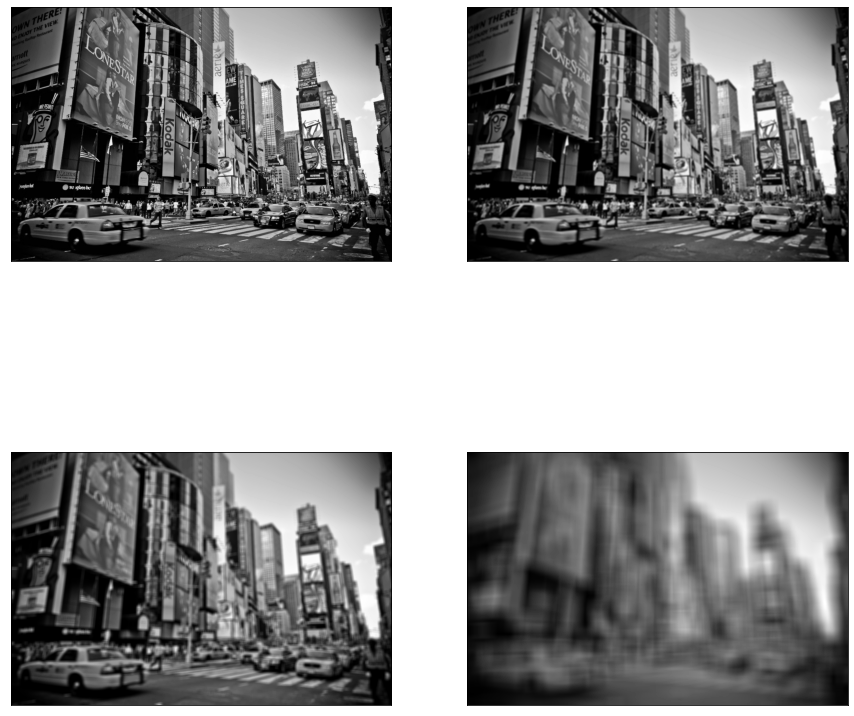

In [5]:
'''
Apply 5x5, 9x9 and 15x15 box filters.
The OpenCV function boxFilter() is almost equivalent.
'''
im = cv2.imread('new_york_hop.jpg',cv2.IMREAD_GRAYSCALE )
# im = cv2.resize(im, (im.shape[1]//4, im.shape[0]//4))
print(im.shape)
blur5 = cv2.blur(im,(5,5))
blur9 = cv2.blur(im,(9,9))
blur15 = cv2.blur(im,(45,45))
im_list = [im,blur5,blur9,blur15]
title_list = ['Original', '5x5', '9x9', '15x15']
plot_pics(im_list)

(1200, 1600, 3)
2 2 1
2 2 2
2 2 3
2 2 4


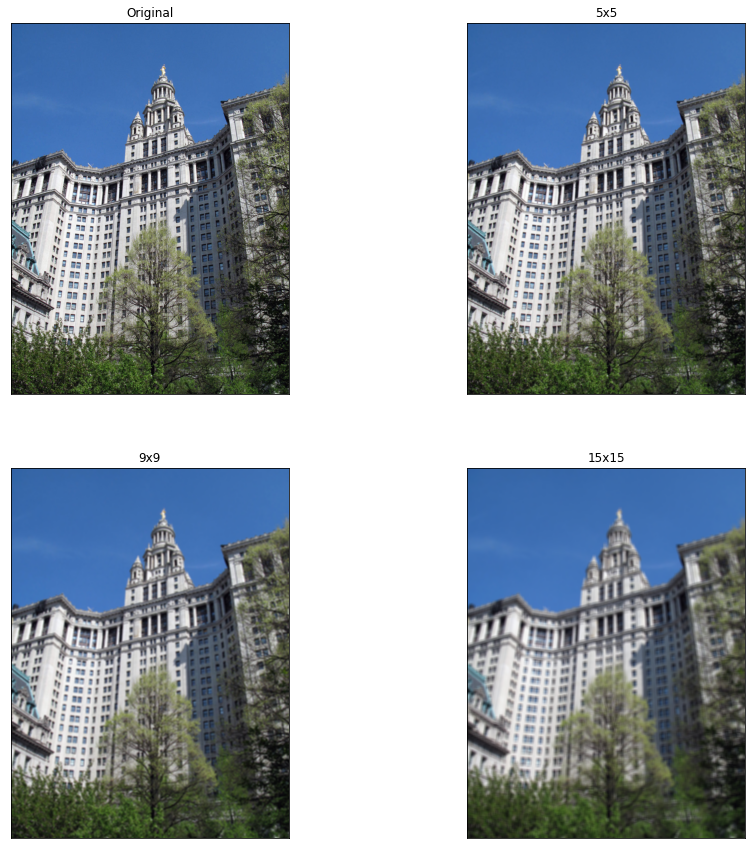

In [6]:
'''
We can do the same thing with the color image.  Each channel is filtered separately,
without our having to do anything explicitly!
'''
im = cv2.imread('Municipal_Building_-_New_York_City.jpg')
print(im.shape)
im = im[:,:,::-1]
# im = np.transpose(im, axes=(1,0,2))
im = np.rot90(im, axes=(0,1))
blur5 = cv2.blur(im,(5,5))
blur9 = cv2.blur(im,(9,9))
blur15 = cv2.blur(im,(15,15))
im_list = [im,blur5,blur9,blur15]
title_list = ['Original', '5x5', '9x9', '15x15']
plot_pics(im_list,2,title_list)



3 2 1
3 2 2
3 2 3
3 2 4
3 2 5
3 2 6


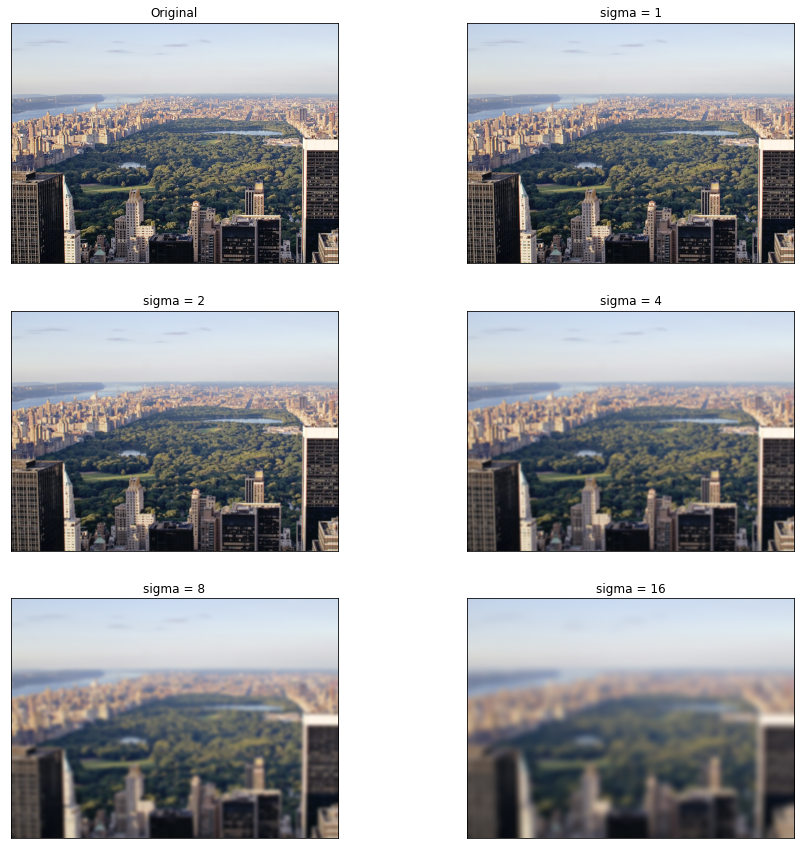

In [7]:
'''
Now let's try Gaussian smoothing.
We specify the kernel as covering +/- 2 sigma pixels.
'''
im = cv2.imread('New-York-City---Manhattan---Central-Park---(Gentry).jpg')
im = im[:,:,::-1]
sigma = 1
n = 5
im_list = [ im ]
title_list = [ 'Original' ]
for i in range(n):
    ksize = (4*sigma+1,4*sigma+1)
    im_s = cv2.GaussianBlur(im, ksize, sigma)
    im_list += [im_s]
    title_list += [ 'sigma = ' + str(sigma) ]
    sigma *= 2
plot_pics(im_list,2,title_list)

In [8]:
'''
Now we are going to compute the derivatives by forming two 2d kernels.
We'll start by applying this to a toy example.
'''
toy_image = np.array( [ [ 0,  0,  0,  0,  0,  0,  0,  0 ],
                        [ 0,  0,  0,  0,  0,  0,  0,  0 ],
                        [ 0,  0, 99, 99, 99, 99,  0,  0 ],
                        [ 0,  0, 99, 99, 99, 99,  0,  0 ],
                        [ 0,  0, 99, 99, 99, 99,  0,  0 ],
                        [ 0,  0, 99, 99, 99, 99,  0,  0 ],
                        [ 0,  0, 99, 99, 99, 99,  0,  0 ],
                        [ 0,  0,  0,  0,  0,  0,  0,  0 ],
                        [ 0,  0,  0,  0,  0,  0,  0,  0 ] ], dtype = np.float32 )

dx_kernel = np.array( [[-0.5, 0, 0.5]])
print("X derivate kernel")
print(dx_kernel)
im_dx = cv2.filter2D( toy_image, -1, dx_kernel)   # -1 means to use toy_image's pixel type
print("\nX derivative result")
print(im_dx)

dy_kernel = np.array( [[-0.5], [0], [0.5]] )
print("\nY derivate kernel")
print(dy_kernel)
im_dy = cv2.filter2D( toy_image, -1, dy_kernel)
print("\nY derivative result")
print(im_dy)



X derivate kernel
[[-0.5  0.   0.5]]

X derivative result
[[  0.    0.    0.    0.    0.    0.    0.    0. ]
 [  0.    0.    0.    0.    0.    0.    0.    0. ]
 [  0.   49.5  49.5   0.    0.  -49.5 -49.5   0. ]
 [  0.   49.5  49.5   0.    0.  -49.5 -49.5   0. ]
 [  0.   49.5  49.5   0.    0.  -49.5 -49.5   0. ]
 [  0.   49.5  49.5   0.    0.  -49.5 -49.5   0. ]
 [  0.   49.5  49.5   0.    0.  -49.5 -49.5   0. ]
 [  0.    0.    0.    0.    0.    0.    0.    0. ]
 [  0.    0.    0.    0.    0.    0.    0.    0. ]]

Y derivate kernel
[[-0.5]
 [ 0. ]
 [ 0.5]]

Y derivative result
[[  0.    0.    0.    0.    0.    0.    0.    0. ]
 [  0.    0.   49.5  49.5  49.5  49.5   0.    0. ]
 [  0.    0.   49.5  49.5  49.5  49.5   0.    0. ]
 [  0.    0.    0.    0.    0.    0.    0.    0. ]
 [  0.    0.    0.    0.    0.    0.    0.    0. ]
 [  0.    0.    0.    0.    0.    0.    0.    0. ]
 [  0.    0.  -49.5 -49.5 -49.5 -49.5   0.    0. ]
 [  0.    0.  -49.5 -49.5 -49.5 -49.5   0.    0. ]
 [  0.   

2 2 1
2 2 2
2 2 3


<Figure size 432x288 with 0 Axes>

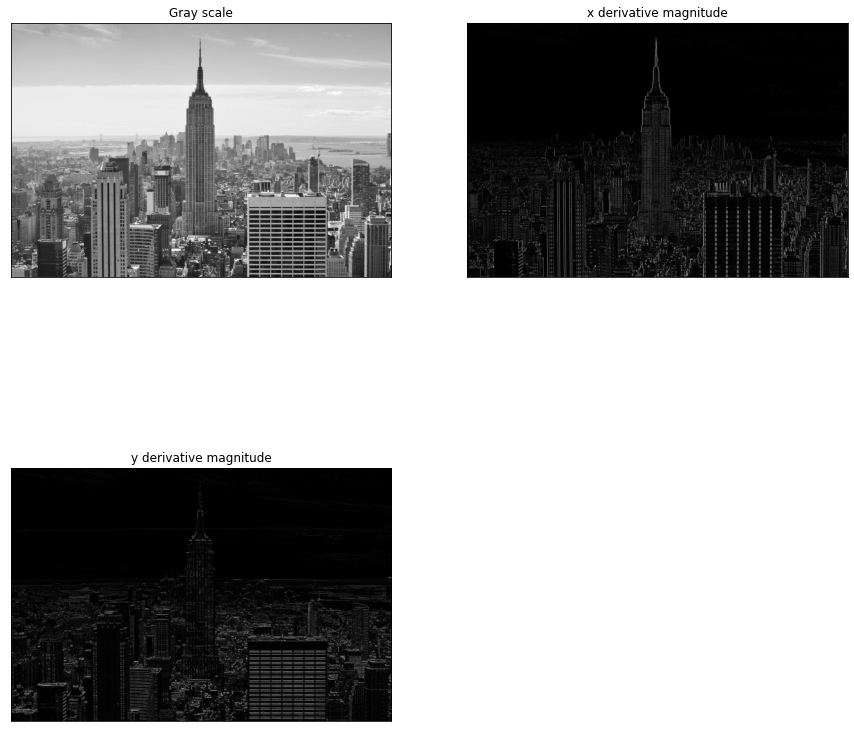

In [12]:
'''
Now we can apply these operations to a "real" image.
We'll start by converting to gray scale
'''
im_gray = cv2.imread("New-York-skyline_0.jpg", cv2.IMREAD_GRAYSCALE)
im_dx = cv2.filter2D( im_gray, cv2.CV_32F, dx_kernel)
im_dy = cv2.filter2D( im_gray, cv2.CV_32F, dy_kernel)
im_dx_abs = np.abs(2*im_dx).astype(np.uint8)
im_dy_abs = np.abs(2*im_dy).astype(np.uint8)
im_list = [im_gray, im_dx_abs, im_dy_abs]
title_list = ["Gray scale", "x derivative magnitude", "y derivative magnitude"]

plot_pics(im_list,2,title_list)

In [9]:
'''
Here is a purely NumPy way to calculate derivatives.  This is 
more for illustrative purposes.  In practice, OpenCV functions
should be used unless there is a specific reason not to do so.

Notes:
1. Boundary effects are handled by initializing to 0 on
the outside of the image.
2. Slicing is used to implicitly shift the images one pixel
to the left and to the right so that x derivatives can be
calculated with simple arithmetic operations.  The same is
true for the y derivative.
'''
print("Toy image again:")
print(toy_image)
im_dx = np.zeros_like(toy_image, dtype=np.float32)
left_shift = toy_image[1:-1, :-2]
right_shift = toy_image[1:-1, 2:]
im_dx[1:-1, 1:-1] = 0.5*right_shift - 0.5*left_shift
print("\nX derivative result")
print(im_dx)

im_dy = np.zeros_like(toy_image, dtype = np.float32)
down_shift = toy_image[:-2, 1:-1]
up_shift = toy_image[2:, 1:-1]
im_dy[1:-1, 1:-1] = 0.5*up_shift - 0.5*down_shift
print("\nY derivative result")
print(im_dy)



Toy image again:
[[ 0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0. 99. 99. 99. 99.  0.  0.]
 [ 0.  0. 99. 99. 99. 99.  0.  0.]
 [ 0.  0. 99. 99. 99. 99.  0.  0.]
 [ 0.  0. 99. 99. 99. 99.  0.  0.]
 [ 0.  0. 99. 99. 99. 99.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.]]

X derivative result
[[  0.    0.    0.    0.    0.    0.    0.    0. ]
 [  0.    0.    0.    0.    0.    0.    0.    0. ]
 [  0.   49.5  49.5   0.    0.  -49.5 -49.5   0. ]
 [  0.   49.5  49.5   0.    0.  -49.5 -49.5   0. ]
 [  0.   49.5  49.5   0.    0.  -49.5 -49.5   0. ]
 [  0.   49.5  49.5   0.    0.  -49.5 -49.5   0. ]
 [  0.   49.5  49.5   0.    0.  -49.5 -49.5   0. ]
 [  0.    0.    0.    0.    0.    0.    0.    0. ]
 [  0.    0.    0.    0.    0.    0.    0.    0. ]]

Y derivative result
[[  0.    0.    0.    0.    0.    0.    0.    0. ]
 [  0.    0.   49.5  49.5  49.5  49.5   0.    0. ]
 [  0.    0.   49.5  49.5  49.5  49.5   0.    0. ]
 [  0.    0.

In [10]:
'''
Finally, we compute the "Sobel" derivatives.  These have 3x3 kernels
    -1 0 1      -1 -2 -1
    -2 0 2  and  0  0  0
    -1 0 1       1  2  1
for the dx and dy derivatives, respectively.  This includes a bit of
smoothing in the differentiation.
'''
print("Toy image again:")
print(toy_image)
im_dx = cv2.Sobel( toy_image, -1, 1, 0)
print("\nX Sobel derivative result")
print(im_dx)
im_dy = cv2.Sobel( toy_image, -1, 0, 1)
print("\nY Sobel derivative result")
print(im_dy)



Toy image again:
[[ 0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0. 99. 99. 99. 99.  0.  0.]
 [ 0.  0. 99. 99. 99. 99.  0.  0.]
 [ 0.  0. 99. 99. 99. 99.  0.  0.]
 [ 0.  0. 99. 99. 99. 99.  0.  0.]
 [ 0.  0. 99. 99. 99. 99.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.]]

X Sobel derivative result
[[   0.    0.    0.    0.    0.    0.    0.    0.]
 [   0.   99.   99.    0.    0.  -99.  -99.    0.]
 [   0.  297.  297.    0.    0. -297. -297.    0.]
 [   0.  396.  396.    0.    0. -396. -396.    0.]
 [   0.  396.  396.    0.    0. -396. -396.    0.]
 [   0.  396.  396.    0.    0. -396. -396.    0.]
 [   0.  297.  297.    0.    0. -297. -297.    0.]
 [   0.   99.   99.    0.    0.  -99.  -99.    0.]
 [   0.    0.    0.    0.    0.    0.    0.    0.]]

Y Sobel derivative result
[[   0.    0.    0.    0.    0.    0.    0.    0.]
 [   0.   99.  297.  396.  396.  297.   99.    0.]
 [   0.   99.  297.  396.  396.  297.   99.    0.]


2 2 1
2 2 2
2 2 3


<Figure size 432x288 with 0 Axes>

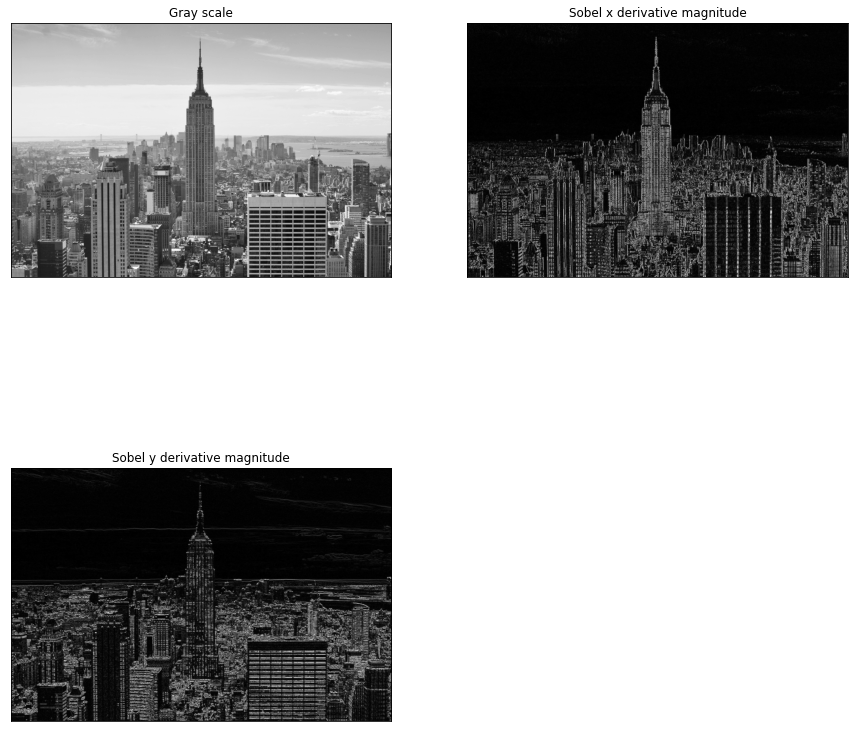

In [13]:
'''
Sobel on a real image
'''
im_dx = cv2.Sobel(im_gray, cv2.CV_32F, 1, 0)
im_dy = cv2.Sobel(im_gray, cv2.CV_32F, 0, 1)
im_dx_abs = np.abs(im_dx).astype(np.uint8)
im_dy_abs = np.abs(im_dy).astype(np.uint8)
im_list = [im_gray, im_dx_abs, im_dy_abs]
title_list = ["Gray scale", "Sobel x derivative magnitude", "Sobel y derivative magnitude"]

plot_pics(im_list,2,title_list)

In [ ]:
'''
Now we'll try some mathematical morphology.  First, a "binarized"
image (a silhouette) of a hand.  What do you see?
'''
hand_img = cv2.imread('hand.png')
plot_pics( [hand_img], 2, ['hand.png'])

In [ ]:
'''
First let's try erosion:

'''
kernel3 = np.ones((3,3),np.uint8)
eroded3 = cv2.erode(hand_img,kernel3,iterations = 1)
kernel5 = np.ones((5,5),np.uint8)
eroded5 = cv2.erode(hand_img,kernel5,iterations = 1)
kernel25 = np.ones((25,25),np.uint8)
eroded25 = cv2.erode(hand_img,kernel25,iterations = 1)
plot_pics( [hand_img, eroded3, eroded5, eroded25], 2,
           ['hand.png', 'Eroded 3x3', 'Eroded 5x5', 'Eroded 25x25'])

In [ ]:
'''
Next, let's try dilation:
'''
dilated3 = cv2.dilate(hand_img,kernel3,iterations = 1)
dilated5 = cv2.dilate(hand_img,kernel5,iterations = 1)
dilated25 = cv2.dilate(hand_img,kernel25,iterations = 1)
plot_pics( [hand_img, dilated3, dilated5, dilated25], 2,
           ['hand.png', 'Dilated 3x3', 'Dilated 5x5', 'Dilated 25x25'])

In [ ]:
'''
Opening next
'''
open3 = cv2.morphologyEx(hand_img, cv2.MORPH_OPEN, kernel3)
open5 = cv2.morphologyEx(hand_img, cv2.MORPH_OPEN, kernel5)
open25 = cv2.morphologyEx(hand_img, cv2.MORPH_OPEN, kernel25)
plot_pics( [hand_img, open3, open5, open25], 2,
           ['hand.png', 'Opened 3x3', 'Opened 5x5', 'Opened 25x25'])

In [ ]:
'''
Closing next
'''
close3 = cv2.morphologyEx(hand_img, cv2.MORPH_CLOSE, kernel3)
close5 = cv2.morphologyEx(hand_img, cv2.MORPH_CLOSE, kernel5)
close25 = cv2.morphologyEx(hand_img, cv2.MORPH_CLOSE, kernel25)
plot_pics( [hand_img, close3, close5, close25], 2,
           ['hand.png', 'Opened 3x3', 'Opened 5x5', 'Opened 25x25'])

In [ ]:
'''
Now for a demo of median filtering.  First with a picture of a zebra corrupted
by salt-and-pepper noise.
'''
zebra_img = cv2.imread('ZebraWithAttachedShadow_noisy_Salt_and_Pepper.jpg',
                        cv2.IMREAD_GRAYSCALE)
zebra_median3 = cv2.medianBlur(zebra_img, 3)
zebra_median5 = cv2.medianBlur(zebra_img, 5)
zebra_median7 = cv2.medianBlur(zebra_img, 7)
plot_pics( [zebra_img, zebra_median3, zebra_median5, zebra_median7], 2,
           ['Zebra Image', 'Median 3x3', 'Median 5x5', 'Median 7x7'])

In [ ]:
'''
Second, with a much tougher case of a corrupted picture of a ship.
The result is cartoon-like.
'''
ship_img = cv2.imread('ship-salt-and-pepper.jpg',
                       cv2.IMREAD_GRAYSCALE)
ship_median3 = cv2.medianBlur(ship_img, 3)
ship_median5 = cv2.medianBlur(ship_img, 5)
ship_median7 = cv2.medianBlur(ship_img, 7)
plot_pics( [ship_img, ship_median3, ship_median5, ship_median7], 2,
           ['Ship Image', 'Median 3x3', 'Median 5x5', 'Median 7x7'])